In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [61]:
data = pd.read_csv("GOOG.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-03,53.275002,53.275002,51.250000,51.811501,51.811501,102612000
1,2019-06-04,52.145000,52.802502,51.684502,52.652500,52.652500,56670000
2,2019-06-05,52.577000,52.677502,51.524502,52.111000,52.111000,43368000
3,2019-06-06,52.249500,52.374500,51.685001,52.216999,52.216999,34064000
4,2019-06-07,52.531502,53.546001,52.419998,53.301998,53.301998,36048000


In [125]:
data.index = pd.to_datetime(data.Date)
price = data['Close']['2023-01-06':'2024-01-06']
price.describe()

count    251.000000
mean     120.291375
std       16.148417
min       88.160004
25%      105.529999
50%      124.349998
75%      133.739998
max      142.820007
Name: Close, dtype: float64

<Figure size 1152x504 with 0 Axes>

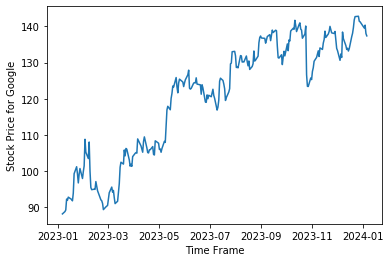

In [63]:
plt.figure(figsize=(16,7))
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel("Time Frame")
ax1.set_ylabel("Stock Price for Google")
ax1.plot(price)

<Figure size 1152x504 with 0 Axes>

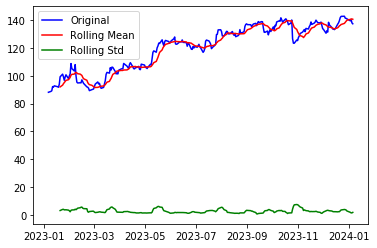

In [129]:
#Checking stationarity
#1 Rolling statistics
rollMean = price.rolling(10).mean()
rollStd = price.rolling(10).std()

plt.figure(figsize=(16,7))
fig = plt.figure()

original = plt.plot(price, color='blue', label='Original')
mean = plt.plot(rollMean, color='red', label='Rolling Mean')
mean = plt.plot(rollStd, color='green', label='Rolling Std')
plt.legend(loc='best')
plt.show()

In [65]:
#2 Duckey fuller
from statsmodels.tsa.stattools import adfuller
def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')

In [66]:
check_stationarity(price)

ADF Statistic: -1.7557216465060625
p-value: 0.40265549491651914
Non-Stationary


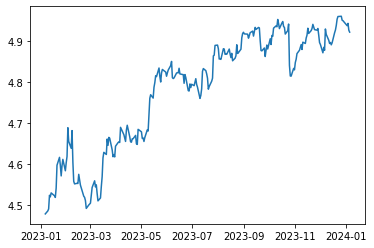

In [67]:
#Making series stationary
ts_log = np.log(price)
plt.plot(ts_log)

<Figure size 1152x504 with 0 Axes>

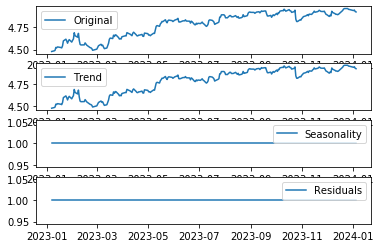

In [136]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, period=1, model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure()

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

<Figure size 1152x504 with 0 Axes>

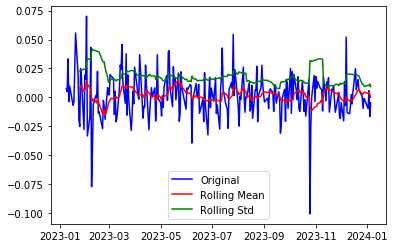

In [69]:
#Differencing
ts_log_diff = ts_log - ts_log.shift()
# plt.plot(ts_log_diff)

rollMean = ts_log_diff.rolling(12).mean()
rollStd = ts_log_diff.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure()

original = plt.plot(ts_log_diff, color='blue', label='Original')
mean = plt.plot(rollMean, color='red', label='Rolling Mean')
mean = plt.plot(rollStd, color='green', label='Rolling Std')
plt.legend(loc='best')
plt.show()

In [70]:
check_stationarity(ts_log_diff.dropna())

ADF Statistic: -14.996514560918097
p-value: 1.1056533663600331e-27
Stationary


In [71]:
price.sort_index(inplace=True)

In [126]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=10)
lag_pacf = pacf(ts_log_diff, nlags=10)

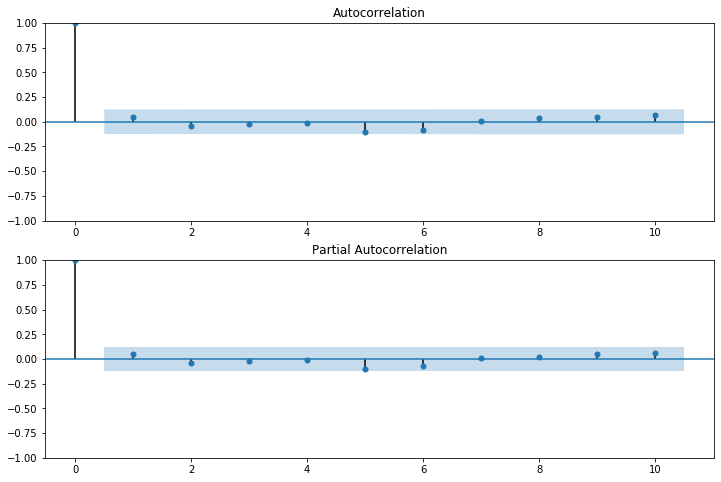

In [128]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(), lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(), lags=10, ax=ax2)

In [74]:
from statsmodels.tsa.arima.model import ARIMA

In [84]:
type(ts_log_diff)

pandas.core.series.Series

In [88]:
price.size
train = price[:230]
test = price[230:]
type(train), type(test)

(pandas.core.series.Series, pandas.core.series.Series)

In [76]:
ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]

1122.2662609543943


C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


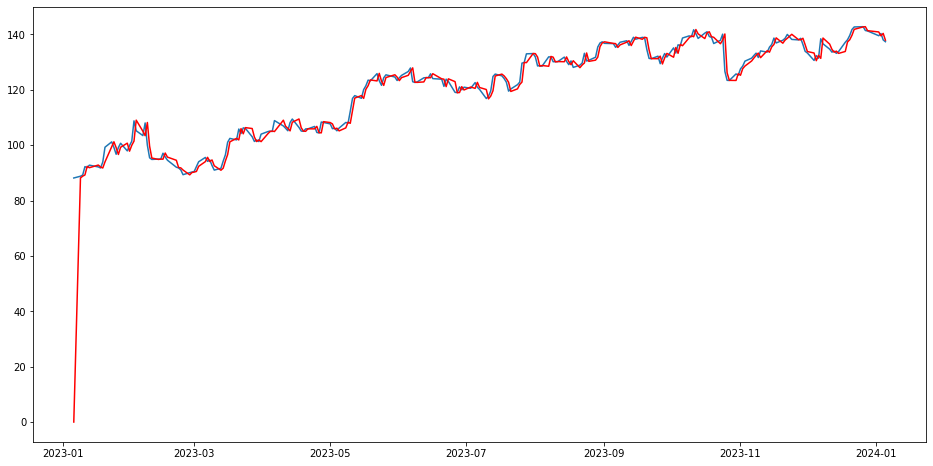

In [144]:
plt.figure(figsize=(16,8))
model = ARIMA(price, order=(1,1,1))
arima_fit = model.fit()
print(arima_fit.aic)
plt.plot(price)
plt.plot(arima_fit.fittedvalues, color='red')

C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1034.6033483653366


C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


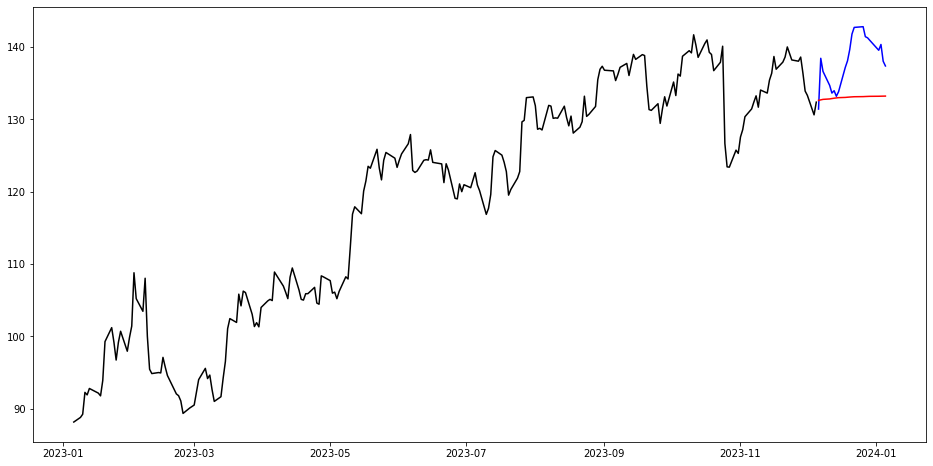

In [140]:
#Predicition
arima_model = ARIMA(train, order=(1,1,3))
arima_fit = arima_model.fit()
print(arima_fit.aic)
arima_pred = arima_fit.forecast(steps=len(test))
arima_pred.index = test.index

plt.figure(figsize=(16,8))
plt.plot(test, color='blue', label='Test Data')
plt.plot(train, color='black', label='Train Data')
plt.plot(arima_pred, color='red', label='ARIMA')

In [120]:
from pmdarima.arima import auto_arima

model = auto_arima(price, seasonal=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1126.244, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1118.696, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1120.521, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1120.510, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1118.606, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1122.454, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.461 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  251
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -558.303
Date:                Thu, 06 Jun 2024   AIC                           1118.606
Time:                        18:34:35   BIC                           1122.127
Sample:                             0   HQIC                          1120.023
          

In [121]:
import itertools
import time
p=d=q = range(0, 5)
pdq = list(itertools.product(p,d,q))

t1 = time.time()

smallest_aic = 100000
for param in pdq:
    try:
        arima_model = ARIMA(train, order=param)
        arima_fit = arima_model.fit()
        aic = arima_fit.aic
        if aic < smallest_aic:
            smallest_aic = aic
            best = param
    except:
        continue
        
print("smallest aic is ", smallest_aic)
print("best parameters are ", best)
print("total time taken: ", time.time()-t1)

C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\

C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\

C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\

C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\

C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\

C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\

C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\

smallest aic is  1028.1716941461448
best parameters are  (0, 1, 0)
total time taken:  64.23181796073914


C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1010.3700785649294


C:\Users\annap\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


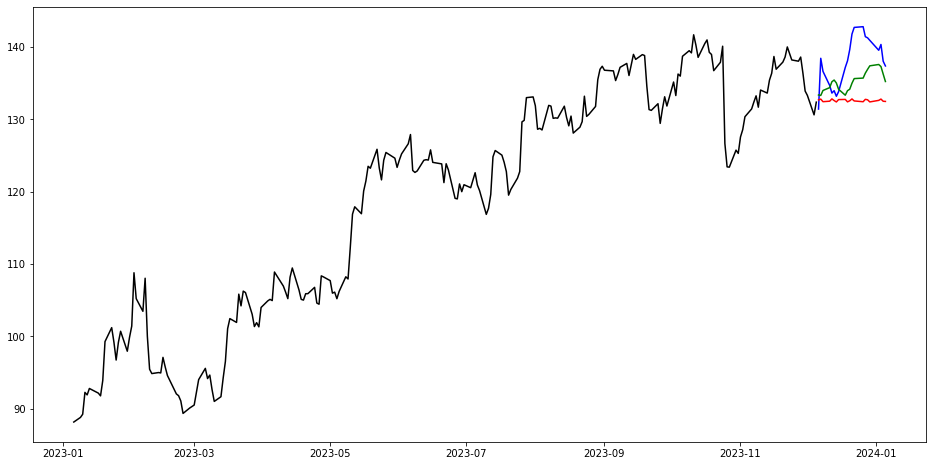

In [122]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
order = (0, 1, 0)
seasonal_order = (1, 1, 1, 12)
sarima_model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit()
print(sarima_fit.aic)
sarima_pred = sarima_fit.forecast(steps=len(test))
sarima_pred.index = test.index

plt.figure(figsize=(16,8))
plt.plot(test, color='blue', label='Test Data')
plt.plot(train, color='black', label='Train Data')
plt.plot(arima_pred, color='red', label='ARIMA')
plt.plot(sarima_pred, color='green', label="SARIMA")

In [ ]:
# # SARIMA
# import time
# import itertools
# p=d=q = range(0,5)
# pdq = list(itertools.product(p,d,q))
# P=D=Q = range(0,5)
# PDQ = list(itertools.product(P,D,Q))
# t1 = time.time()

# smallest_aic = 10000000
# for t_param in pdq:
#     for s_param in PDQ:
#         try:
#             s_param_full = list(s_param) + [12]
#             sarima_model = SARIMAX(train, order=t_param, seasonal_order=s_param_full)
#             sarima_fit = sarima_model.fit()
#             aic = sarima_fit.aic
#             if aic < smallest_aic:
#                 smallest_aic = aic
#                 best_t = t_param
#                 best_s = s_param_full
#         except:
#             continue
            
# print("smallest aic is ", min_aic)
# print("best trend parameters are ", best_t)
# print("best seasonal parameters are ", best_s)
# print("total time taken: ", time.time()-t1)